In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("cstr_runaway.csv")
df.head()
print(df.head(200))

          Temp      Conc  Runaway
0    46.159694  2.755474        0
1    21.555574  2.777391        0
2    52.979749  1.484694        0
3    46.119344  0.520986        0
4    45.222068  2.380263        0
..         ...       ...      ...
195  43.300051  1.803540        0
196  75.554096  4.441730        1
197  54.216453  0.584412        0
198  75.002877  0.912364        1
199  62.135854  2.035445        1

[200 rows x 3 columns]


In [4]:
X = df[['Temp', 'Conc']]
print(X)
Y = df['Runaway']
print(Y)

          Temp      Conc
0    46.159694  2.755474
1    21.555574  2.777391
2    52.979749  1.484694
3    46.119344  0.520986
4    45.222068  2.380263
..         ...       ...
195  43.300051  1.803540
196  75.554096  4.441730
197  54.216453  0.584412
198  75.002877  0.912364
199  62.135854  2.035445

[200 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    1
197    0
198    1
199    1
Name: Runaway, Length: 200, dtype: int64


In [5]:
from sklearn.pipeline import Pipeline

In [145]:
# 1 splitting training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5) #set random state integer as needed

# Creating pipeline reference: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
pipe = Pipeline([('scaler', StandardScaler()),('logreg', LogisticRegression())])
pipe.fit(X_train, Y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [146]:
from sklearn.metrics import accuracy_score
# Predictions
Y_train_pred = pipe.predict(X_train)
Y_test_pred = pipe.predict(X_test)

# Accuracy
train_acc = accuracy_score(Y_train, Y_train_pred)
test_acc = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.94375
Testing Accuracy: 0.925


[[66  4]
 [ 5 85]]
[[20  1]
 [ 2 17]]


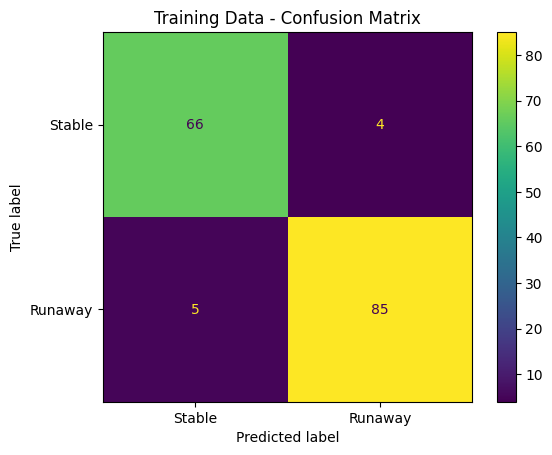

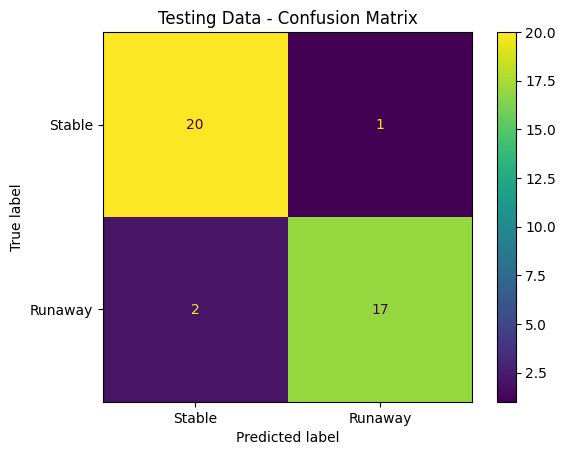

In [147]:
print(confusion_matrix(Y_train, Y_train_pred))
print(confusion_matrix(Y_test, Y_test_pred))

#Visualize referred to the tumor_student_logistic.ipynb example
#confusion matrix for training data
cfm_train = confusion_matrix(Y_train, Y_train_pred)
cm_train = ConfusionMatrixDisplay(confusion_matrix = cfm_train, display_labels = ["Stable", "Runaway"])
cm_train.plot()
plt.title('Training Data - Confusion Matrix')
plt.show()

#confusion matrix for testing data
cfm_test = confusion_matrix(Y_test, Y_test_pred)
cm_test = ConfusionMatrixDisplay(confusion_matrix = cfm_test, display_labels = ["Stable", "Runaway"])
cm_test.plot()
plt.title('Testing Data - Confusion Matrix')
plt.show()


In [148]:
#plotting the decision boundary
def plot_boundary(model, X, Y, title):
    x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
    y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid, columns=X.columns)
    Z = model.predict(grid_df).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, edgecolor='k')
    plt.xlabel("Coolant Temperature")
    plt.ylabel("Feed Concentration")
    plt.title(title)
    plt.show()


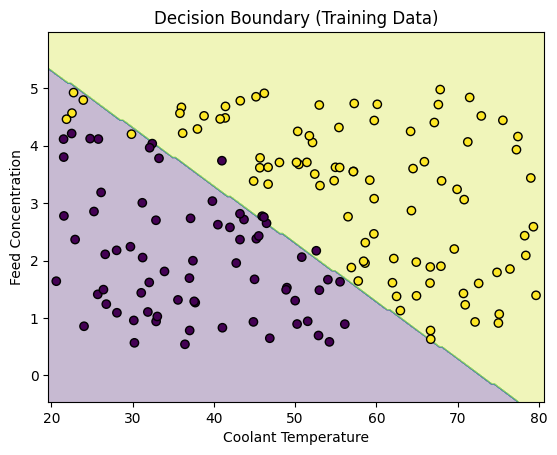

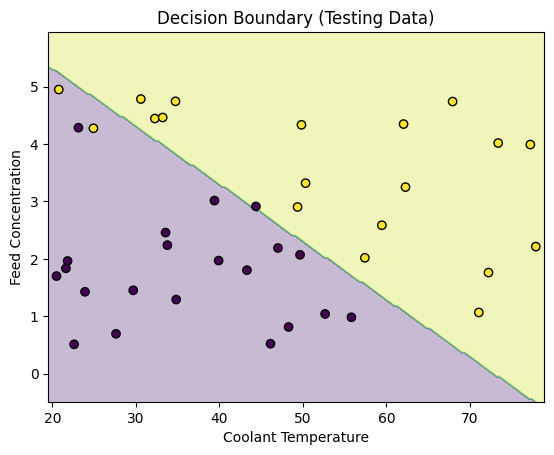

In [149]:
#for training
plot_boundary(pipe, X_train, Y_train,"Decision Boundary (Training Data)")

#for testing
plot_boundary(pipe, X_test, Y_test,"Decision Boundary (Testing Data)")

In [150]:
from sklearn.preprocessing import PolynomialFeatures

In [151]:
# no three, creating pipeline but polynomial features
pipe_poly = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),('scaler', StandardScaler()),
                      ('logreg', LogisticRegression())])

pipe_poly.fit(X_train, Y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('logreg', LogisticRegression())])

In [152]:
# Predictions
Y_train_pred_poly = pipe_poly.predict(X_train)
Y_test_pred_poly = pipe_poly.predict(X_test)

# Accuracy
train_acc_poly = accuracy_score(Y_train, Y_train_pred_poly)
test_acc_poly = accuracy_score(Y_test, Y_test_pred_poly)

print("Training Accuracy:", train_acc_poly)
print("Testing Accuracy:", test_acc_poly)

Training Accuracy: 0.975
Testing Accuracy: 0.975


[[69  1]
 [ 3 87]]
[[21  0]
 [ 1 18]]


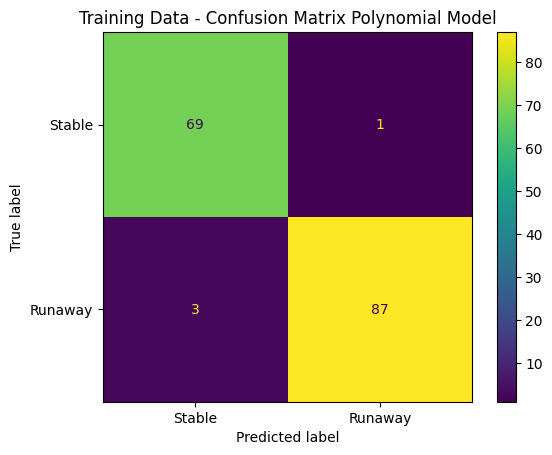

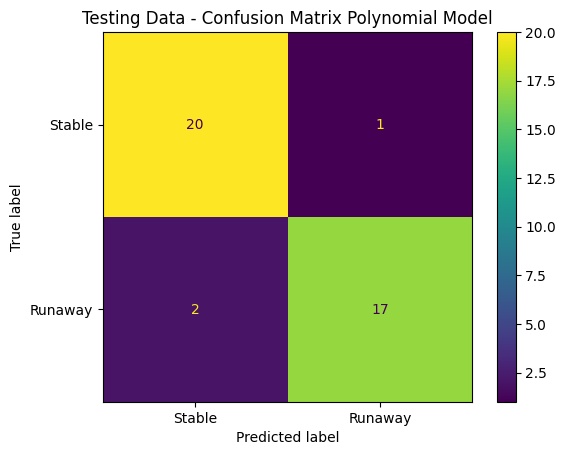

In [153]:
#confusion matrix
print(confusion_matrix(Y_train, Y_train_pred_poly))
print(confusion_matrix(Y_test, Y_test_pred_poly))

#Visualize referred to the tumor_student_logistic.ipynb example
#confusion matrix for training data
cfm_train_poly = confusion_matrix(Y_train, Y_train_pred_poly)
cm_train_poly = ConfusionMatrixDisplay(confusion_matrix = cfm_train_poly, display_labels = ["Stable", "Runaway"])
cm_train_poly.plot()
plt.title('Training Data - Confusion Matrix Polynomial Model')
plt.show()

#confusion matrix for testing data
cfm_test_poly = confusion_matrix(Y_test, Y_test_pred_poly)
cm_test_poly = ConfusionMatrixDisplay(confusion_matrix = cfm_test_poly, display_labels = ["Stable", "Runaway"])
cm_test.plot()
plt.title('Testing Data - Confusion Matrix Polynomial Model')
plt.show()

In [154]:
#define decision boundary
def plot_boundary(model, X, Y, title):
    x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
    y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid, columns=X.columns)
    Z = model.predict(grid_df).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, edgecolor='k')
    plt.xlabel("Coolant Temperature")
    plt.ylabel("Feed Concentration")
    plt.title(title)
    plt.show()

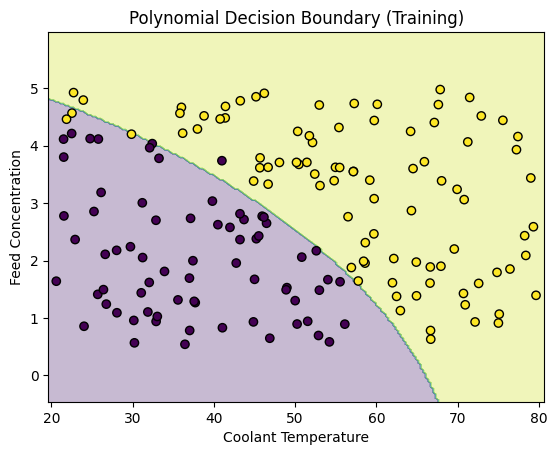

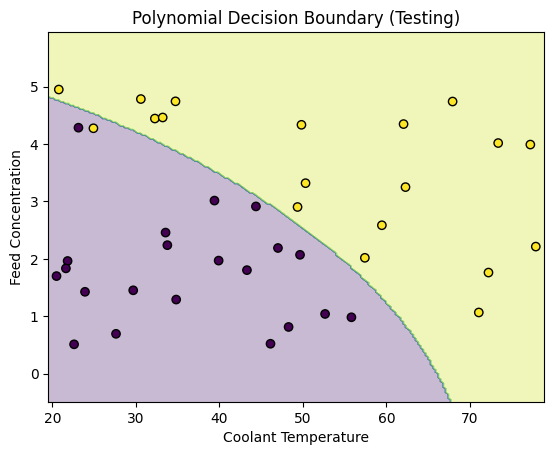

In [155]:
#plotting (Training)
plot_boundary(pipe_poly, X_train, Y_train,"Polynomial Decision Boundary (Training)")

#plotting (Testing)
plot_boundary(pipe_poly, X_test, Y_test,"Polynomial Decision Boundary (Testing)")

Linear Model AUC: 0.9849624060150376
Polynomial Model AUC: 0.9974937343358395


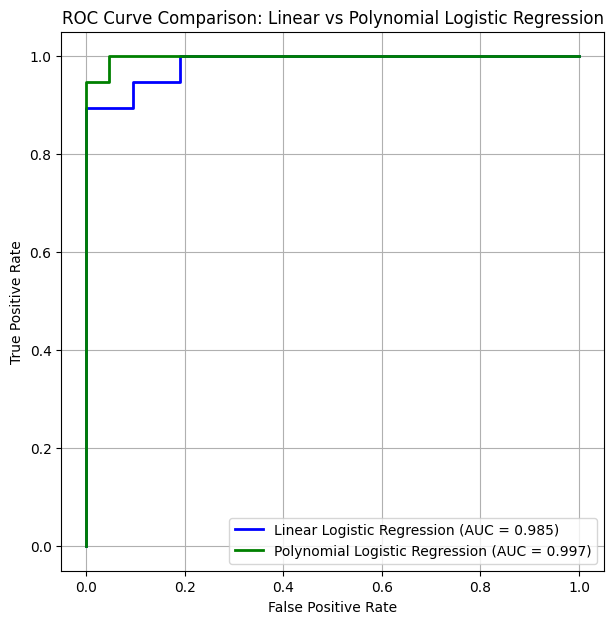

In [156]:
from sklearn import metrics
import matplotlib.pyplot as plt

Y_prob_linear = pipe.predict_proba(X_test)[:,1]

fpr_linear, tpr_linear, thresholds_linear = metrics.roc_curve(Y_test, Y_prob_linear)
auc_linear = metrics.roc_auc_score(Y_test, Y_prob_linear)

print("Linear Model AUC:", auc_linear)


Y_prob_poly = pipe_poly.predict_proba(X_test)[:,1]

fpr_poly, tpr_poly, thresholds_poly = metrics.roc_curve(Y_test, Y_prob_poly)
auc_poly = metrics.roc_auc_score(Y_test, Y_prob_poly)

print("Polynomial Model AUC:", auc_poly)


plt.figure(figsize=(7,7))

plt.plot(fpr_linear, tpr_linear, 'b-', linewidth=2,
label=f'Linear Logistic Regression (AUC = {auc_linear:.3f})')

plt.plot(fpr_poly, tpr_poly, 'g-', linewidth=2,
label=f'Polynomial Logistic Regression (AUC = {auc_poly:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Linear vs Polynomial Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [144]:
# Both models show good determination of stable and runaway conditions.If randomstate integer at 5
#The linear logistic regression achieved an AUC of 0.985,
#while the polynomial model slightly improved performance to 0.997. 
#This suggests the stability boundary is mostly linear, some non-linear interaction between coolant temperature and 
#feed concentration where represented better by the polynomial model.

In [ ]:
#However at randomsate integer at 0 both auc is at 1.0 so needed to indicate integer to get deviations